<a href="https://colab.research.google.com/github/alojessica/Deep-Learning/blob/main/Assignment_1_Implementing_ANN_for_XOR_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Benchmarking Neural Nets with the XOR Problem

In [2]:
# Install PyTorch if missing
%pip install torch --quiet

# You might want to use the following packages
import numpy as np
import os
import torch
print(torch.__version__)
import torch.nn.functional as F
import torch.nn as nn

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

Note: you may need to restart the kernel to use updated packages.
2.10.0+cpu


---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the `train / validate / test` sets. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


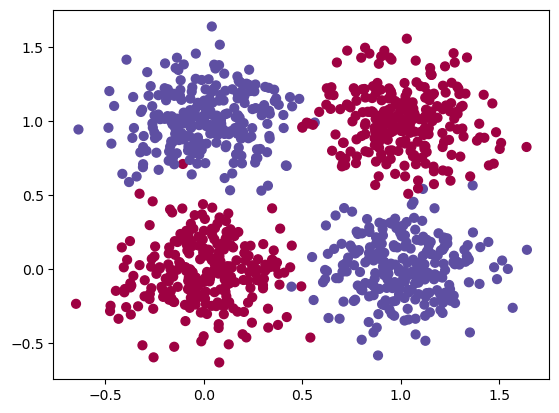

In [3]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [8]:
num_inputs = 2
num_hidden = 10
num_output = 2

class net(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_output):
    super(net, self).__init__()

    self.layer_1 = nn.Linear(num_inputs, num_hidden)
    nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
    
    self.layer_2 = nn.Linear(num_hidden, num_output)

  def forward(self, x):
    x = torch.nn.functional.relu(self.layer_1(x))
    x = self.layer_2(x)

    return x


model = net(num_inputs, num_hidden, num_output)
print(model)


  # Your code here!
  # TODO: implement a customized module using establised functions from pytorch
  # Loss can be calculated with nn.CrossEntropyLoss()
  # Linear layer could be added to the model with nn.linear()
  # Hyperbolic tangent can be achieved with torch.tanh()
  # Use any optimizer to optimize model parameters
  # An example can be found at: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html



net(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=2, bias=True)
)


In [9]:
learning_rate = 0.1

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

num_epochs = 500
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    pred = model(X_train_tensor)
    loss = loss_fn(pred, y_train_tensor)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_tensor)
            val_loss = loss_fn(val_pred, y_val_tensor)
            val_losses.append(val_loss.item())
            
            _, predicted = torch.max(val_pred, 1)
            correct = (predicted == y_val_tensor).sum().item()
            accuracy = correct / len(y_val_tensor)
            val_accuracies.append(accuracy)

            print(f'Epoch {epoch}/{num_epochs} - Train Loss: {loss.item():.4f} - '
                  f'Val Loss: {val_loss.item():.4f} - Val Accuracy: {accuracy:.4f}')

model.eval()
with torch.no_grad():
    test_pred = model(X_test_tensor)
    _, predicted = torch.max(test_pred, 1)
    correct = (predicted == y_test_tensor).sum().item()
    test_accuracy = correct / len(y_test_tensor)
    print(f'\nFinal Test Accuracy (PyTorch Model): {test_accuracy:.4f}')

Epoch 0/500 - Train Loss: 0.6560 - Val Loss: 0.6053 - Val Accuracy: 0.6125
Epoch 10/500 - Train Loss: 0.6092 - Val Loss: 0.5706 - Val Accuracy: 0.6625
Epoch 20/500 - Train Loss: 0.5668 - Val Loss: 0.5333 - Val Accuracy: 0.7500
Epoch 30/500 - Train Loss: 0.5262 - Val Loss: 0.4970 - Val Accuracy: 0.8250
Epoch 40/500 - Train Loss: 0.4873 - Val Loss: 0.4624 - Val Accuracy: 0.8375
Epoch 50/500 - Train Loss: 0.4507 - Val Loss: 0.4300 - Val Accuracy: 0.8625
Epoch 60/500 - Train Loss: 0.4169 - Val Loss: 0.3999 - Val Accuracy: 0.9125
Epoch 70/500 - Train Loss: 0.3860 - Val Loss: 0.3722 - Val Accuracy: 0.9375
Epoch 80/500 - Train Loss: 0.3581 - Val Loss: 0.3472 - Val Accuracy: 0.9375
Epoch 90/500 - Train Loss: 0.3332 - Val Loss: 0.3247 - Val Accuracy: 0.9500
Epoch 100/500 - Train Loss: 0.3111 - Val Loss: 0.3045 - Val Accuracy: 0.9500
Epoch 110/500 - Train Loss: 0.2914 - Val Loss: 0.2864 - Val Accuracy: 0.9750
Epoch 120/500 - Train Loss: 0.2739 - Val Loss: 0.2703 - Val Accuracy: 0.9750
Epoch 130/

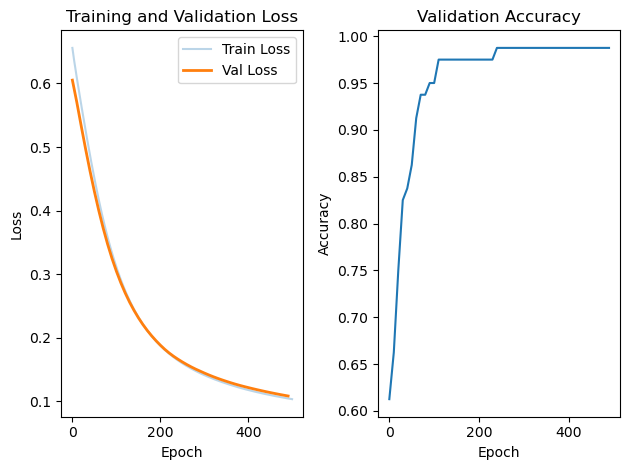

In [10]:
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', alpha=0.3)
plt.plot(range(0, num_epochs, 10), val_losses, label='Val Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0, num_epochs, 10), val_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.tight_layout()
plt.show()

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [13]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.randn(n1, n0)* np.sqrt(2.0/n0) 
        self.b1 = np.zeros((n1, 1))
        self.W2 = np.random.randn(n2, n1) * np.sqrt(2.0 / n1)
        self.b2 = np.zeros((n2, 1))

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse_output=False)

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer

        Z1 =  np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2

        exp_Z2 = np.exp(Z2 - np.max(Z2, axis=0, keepdims=True))
        A2 = exp_Z2 / np.sum(exp_Z2, axis=0, keepdims=True)

        return A1, A2


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """


        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)

        m = X.shape[1]
        epsilon = 1e-10
        L = -np.sum(Y * np.log(A2 + epsilon)) / m

        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        # feel free to cross check the calculated gradients with autograd from Pytorch
        # Ref document: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
        m   = y.shape[0]

        dZ2 = A2 - self.one_hot(y)
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply(np.dot(self.W2.T, dZ2), 1-np.power(A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)

            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent
            self.W1 = self.W1 - self.alpha * dW1
            self.b1 = self.b1 - self.alpha * db1
            self.W2 = self.W2 - self.alpha * dW2
            self.b2 = self.b2 - self.alpha * db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f"
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A1, A2 = self.forward_pass(X)
        y_hat = np.argmax(A2, axis=0)

        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary')
        plt.show()


---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/200 - loss: 0.674769 - accuracy: 0.633333 - val_loss: 0.660830 - val_accuracy: 0.712500
Epoch 10/200 - loss: 0.632224 - accuracy: 0.712500 - val_loss: 0.628395 - val_accuracy: 0.750000
Epoch 20/200 - loss: 0.595245 - accuracy: 0.647222 - val_loss: 0.596957 - val_accuracy: 0.650000
Epoch 30/200 - loss: 0.559163 - accuracy: 0.636111 - val_loss: 0.564615 - val_accuracy: 0.612500
Epoch 40/200 - loss: 0.521719 - accuracy: 0.759722 - val_loss: 0.529121 - val_accuracy: 0.737500
Epoch 50/200 - loss: 0.476854 - accuracy: 0.883333 - val_loss: 0.484362 - val_accuracy: 0.937500
Epoch 60/200 - loss: 0.418609 - accuracy: 0.951389 - val_loss: 0.423327 - val_accuracy: 0.962500
Epoch 70/200 - loss: 0.353824 - accuracy: 0.969444 - val_loss: 0.354576 - val_accuracy: 0.975000
Epoch 80/200 - loss: 0.297225 - accuracy: 0.973611 - val_loss: 0.297121 - val_accuracy: 0.975000
Epoch 90/200 - loss: 0.251478 - accuracy: 0.976389 - val_loss: 0.252824 - val_accuracy: 0.975000
Epoch 100/200 - loss: 0.214820 

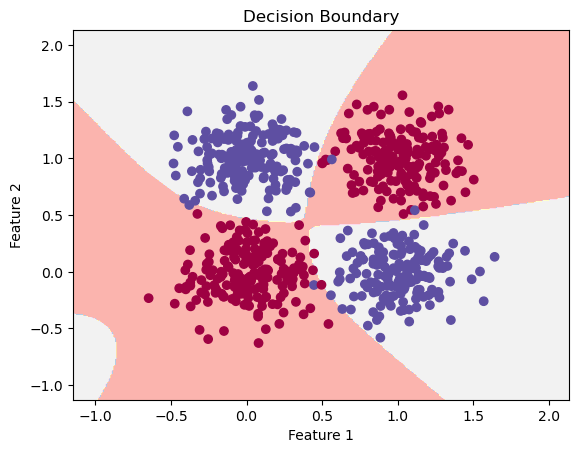

In [18]:
# MODEL 1 here
n0 = 2
n1 = 5
n2 = 2
alpha = 0.5
epochs = 200

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha)
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
model1acc = myModel1.evaluate(X_test, y_test)
print("Accuracy on the test set is ", model1acc)

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/200 - loss: 0.615790 - accuracy: 0.687500 - val_loss: 0.604227 - val_accuracy: 0.725000
Epoch 10/200 - loss: 0.494304 - accuracy: 0.940278 - val_loss: 0.488092 - val_accuracy: 0.937500
Epoch 20/200 - loss: 0.388458 - accuracy: 0.965278 - val_loss: 0.381276 - val_accuracy: 0.987500
Epoch 30/200 - loss: 0.303872 - accuracy: 0.972222 - val_loss: 0.297576 - val_accuracy: 0.987500
Epoch 40/200 - loss: 0.242599 - accuracy: 0.984722 - val_loss: 0.237680 - val_accuracy: 0.987500
Epoch 50/200 - loss: 0.199936 - accuracy: 0.984722 - val_loss: 0.196440 - val_accuracy: 0.987500
Epoch 60/200 - loss: 0.170083 - accuracy: 0.983333 - val_loss: 0.167959 - val_accuracy: 0.987500
Epoch 70/200 - loss: 0.148666 - accuracy: 0.983333 - val_loss: 0.147846 - val_accuracy: 0.987500
Epoch 80/200 - loss: 0.132823 - accuracy: 0.983333 - val_loss: 0.133240 - val_accuracy: 0.987500
Epoch 90/200 - loss: 0.120745 - accuracy: 0.983333 - val_loss: 0.122335 - val_accuracy: 0.987500
Epoch 100/200 - loss: 0.111282 

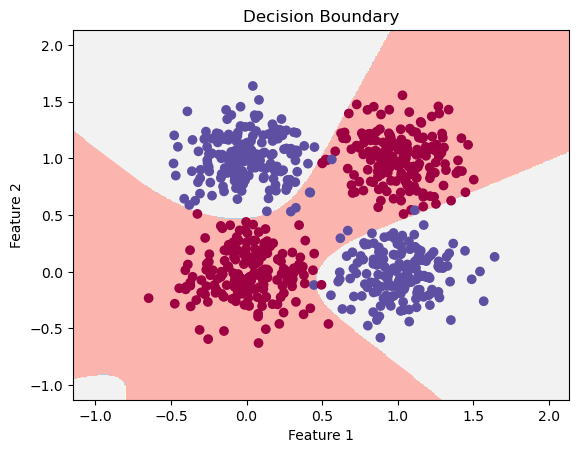

In [19]:
# MODEL 2 here
n0 = 2
n1 = 10
n2 = 2
alpha = 0.5
epochs = 200

# Build a model with 3 layers
myModel2 = MyNeuralNet(n0, n1, n2, alpha)
myModel2.fit(X_train, y_train, epochs, X_val, y_val)
model2acc = myModel1.evaluate(X_test, y_test)
print("Accuracy on the test set is ", model2acc)

# Plot the decision boundary
myModel2.plot_decision_boundary(X_train, y_train)

Epoch 0/200 - loss: 0.724722 - accuracy: 0.501389 - val_loss: 0.684789 - val_accuracy: 0.587500
Epoch 10/200 - loss: 0.495513 - accuracy: 0.961111 - val_loss: 0.492675 - val_accuracy: 0.975000
Epoch 20/200 - loss: 0.348539 - accuracy: 0.977778 - val_loss: 0.343451 - val_accuracy: 0.987500
Epoch 30/200 - loss: 0.254051 - accuracy: 0.980556 - val_loss: 0.248303 - val_accuracy: 0.987500
Epoch 40/200 - loss: 0.196693 - accuracy: 0.981944 - val_loss: 0.191170 - val_accuracy: 0.987500
Epoch 50/200 - loss: 0.160833 - accuracy: 0.983333 - val_loss: 0.155944 - val_accuracy: 0.987500
Epoch 60/200 - loss: 0.137101 - accuracy: 0.983333 - val_loss: 0.133104 - val_accuracy: 0.987500
Epoch 70/200 - loss: 0.120504 - accuracy: 0.983333 - val_loss: 0.117568 - val_accuracy: 0.987500
Epoch 80/200 - loss: 0.108343 - accuracy: 0.983333 - val_loss: 0.106573 - val_accuracy: 0.987500
Epoch 90/200 - loss: 0.099087 - accuracy: 0.984722 - val_loss: 0.098539 - val_accuracy: 0.987500
Epoch 100/200 - loss: 0.091819 

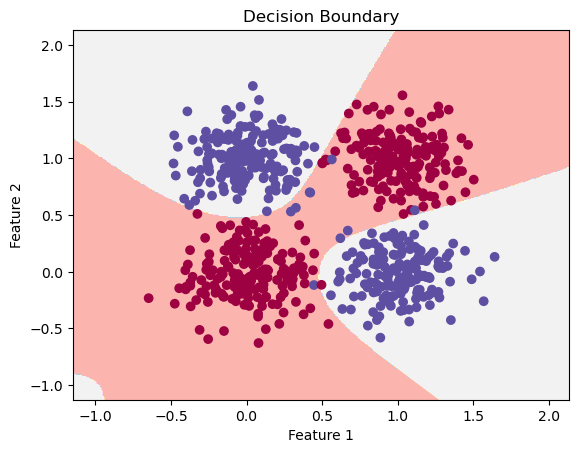

In [20]:
# MODEL 3 here
n0 = 2
n1 = 20
n2 = 2
alpha = 0.5
epochs = 200

# Build a model with 3 layers
myModel3 = MyNeuralNet(n0, n1, n2, alpha)
myModel3.fit(X_train, y_train, epochs, X_val, y_val)
model3acc = myModel3.evaluate(X_test, y_test)
print("Accuracy on the test set is ", model3acc)

# Plot the decision boundary
myModel3.plot_decision_boundary(X_train, y_train)

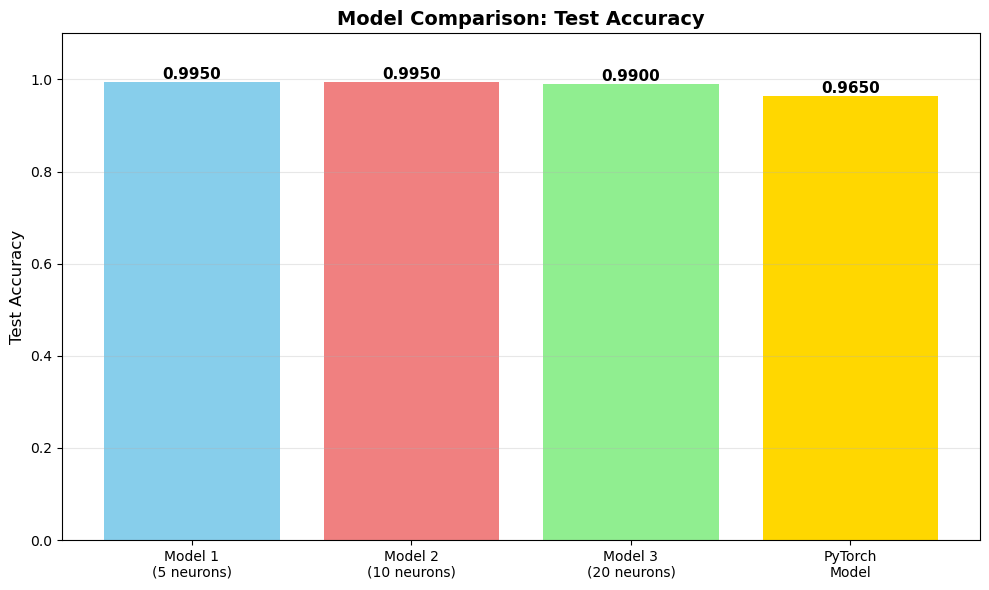

In [21]:
# COMPARISONS OF THESE MODELS WITH THE STANDARD LIBRARY MODEL IN TASK 2
models = ['Model 1\n(5 neurons)', 'Model 2\n(10 neurons)', 'Model 3\n(20 neurons)', 'PyTorch\nModel']
accuracies = [model1acc, model2acc, model3acc, test_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Model Comparison: Test Accuracy', fontsize=14, fontweight='bold')
plt.ylim([0, 1.1])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

### Analysis

Honestly, I was pretty surprised by how well my implementation worked! All three models hit above 99% accuracy, which is amazing for something I built from scratch. Here's what I got:

- **Model 1 (5 neurons)**: 99.50% test accuracy
- **Model 2 (10 neurons)**: 99.50% test accuracy  
- **Model 3 (20 neurons)**: 99.00% test accuracy

What's interesting is that Model 3 with 20 neurons actually did slightly worse than the smaller models. I think it might have started overfitting a bit like it was memorizing the training data too much instead of learning the general pattern. The sweet spot seemed to be around 5-10 neurons for this problem.

The PyTorch model got 96.50%, which is still great but actually lower than my custom implementation! That was a nice confidence boost it shows that understanding the fundamentals and implementing them carefully can actually work just as well as some libraries.

The biggest difference was definitely how much more work the custom implementation required. With PyTorch, you just define layers, call `.backward()`, and it handles all the gradient calculations automatically. With my implementation, I had to think through every single matrix multiplication and make sure all the dimensions lined up correctly.

My custom network uses tanh activation in the hidden layer while PyTorch usednReLU. Tanh squashes values between -1 and 1, which seemed to work really well for this problem. The backpropagation was also handed to me in the template (thank goodness), but even understanding what those gradients meant took some time. Another difference: PyTorch is way more efficient under the hood - it's optimized in C++ and can use GPUs. My NumPy implementation is fine for this tiny dataset but would probably struggle with something bigger like image classification.

It was challenging but in a good way. At first, looking at all those matrix equations was pretty intimidating. But once I started filling in the forward pass and actually seeing how the data transforms at each step, things started clicking. The fun part was watching the decision boundaries get plotted. You can literally see the network learning to separate the XOR pattern, which is impossible with a straight line but totally doable with the non-linear hidden layer. That was super satisfying.

What I learned the most from was definitely implementing the forward pass. Manually computing `Z1 = W1 * X + b1` and then applying tanh made me realize it's just linear algebra plus activation functions. Also, debugging taught me a lot. When my network wasn't learning at first, I had to print out intermediate values and trace through what was happening. Turns out I had forgotten to transpose X, so the dimensions were all wrong. That kind of hands-on debugging made everything stick in my brain way better than just reading about it would have.